# Описание проекта

Мы работаем в IT-компании, которая выполняет на заказ проекты по машинному обучению. К нам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».

Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!

Поэтому он просит нас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:
1. Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
2. Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

С помощью модели нужно отобрать коров по двум критериям:
- средний удой за год — не менее 6000 килограммов;
- молоко должно быть вкусным.

**План:**

1. Изучить общую информацию о данных
2. Сделать предобработку, если есть необходимость
3. Провести исследовательский анализ
4. Провести корреляционный анализ
5. Подготовить данные к использованию в машинном обучении
6. Обучить модель линейной регрессии
7. Обучить модель логистической регрессии
8. Подобрать коров под критерии заказчика

## Загрузка данных

### Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import phik
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (r2_score, 
                            mean_absolute_error, 
                            mean_squared_error,
                            accuracy_score,
                            precision_score,
                            recall_score,
                            confusion_matrix
)
%matplotlib inline

### Загрузка файлов

In [2]:
try:
    ferma_main = pd.read_csv('C:/Users/99893/yandex_practicum_course/linear_model sprint_5/ferma_main.csv', sep=';', decimal=',')
    ferma_dad = pd.read_csv('C:/Users/99893/yandex_practicum_course/linear_model sprint_5/ferma_dad.csv', sep=';', decimal=',')
    cow_buy = pd.read_csv('C:/Users/99893/yandex_practicum_course/linear_model sprint_5/cow_buy.csv', sep=';', decimal=',')
except:
    ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal=',')
    ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';', decimal=',')
    cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';', decimal=',')

### Общая информация и первые 5 строк датафреймов

In [3]:
ferma_main.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [4]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

In [5]:
ferma_dad.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [6]:
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [7]:
cow_buy.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


In [8]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


### Вывод:

Размеры датафреймов
- ferma_main (634, 12)
- ferma_dad (629, 2)
- cow_buy (20, 7)

Некоторые типы данных нужно заменить, также формат записи названий столбцов несоответствует стандарту. Пропусков в данных нет.

##  Предобработка данных

### Переименование названий столбцов

In [9]:
ferma_main_old_col_name = ferma_main.columns
ferma_dad_old_col_name = ferma_dad.columns
cow_buy_old_col_name = cow_buy.columns

In [10]:
ferma_main_new_col_name = [
    'id',
    'milk_yield_kg',
    'eke_energy_feed_unit',
    'raw_protein_g',
    'spo_sugar_protein_ratio',
    'breed',
    'pasture_type',
    'dad_breed',
    'fat_content_percent',
    'protein_content_percent',
    'milk_taste',
    'age'
]
ferma_dad_new_col_name = [
    'id',
    'dad_name'
]
cow_buy_new_col_name = [
    'breed',
    'pasture_type',
    'dad_breed',
    'dad_name',
    'current_fat_content_percent',
    'current_protein_content_percent',
    'age'
]

ferma_main.columns = ferma_main_new_col_name
ferma_dad.columns = ferma_dad_new_col_name
cow_buy.columns = cow_buy_new_col_name

**Создадим словарь, где ключами будут новые названия, а значениями старые**

In [11]:
# Функция форматирующая строки в правильный вид
def rename_col(name_col):
    if name_col[:2] == name_col[:2].upper():
        return name_col
    elif len(name_col) == 2:
        return name_col
    elif ('_' in name_col or '%' in name_col):
        return name_col.capitalize().replace('%', ' %').replace('_', ' ')
    else:
        return name_col.capitalize()

Создадим переменные со старыми и новыми названиями столбцов со всех датафреймов

In [12]:
old_name = list(ferma_main_old_col_name) + list(ferma_dad_old_col_name) + list(cow_buy_old_col_name)

correct_old_name = [rename_col(item) for item in old_name]
new_name = list(ferma_main_new_col_name) + list(ferma_dad_new_col_name) + list(cow_buy_new_col_name)

print(len(correct_old_name))
len(new_name)

21


21

Создадим dict

In [13]:
dict_name = {}
for i in range(len(new_name)):
    if new_name[i] in dict_name:
        continue
    dict_name[new_name[i]] = correct_old_name[i]

In [14]:
dict_name

{'id': 'id',
 'milk_yield_kg': 'Удой, кг',
 'eke_energy_feed_unit': 'ЭКЕ (Энергетическая кормовая единица)',
 'raw_protein_g': 'Сырой протеин, г',
 'spo_sugar_protein_ratio': 'СПО (Сахаро-протеиновое соотношение)',
 'breed': 'Порода',
 'pasture_type': 'Тип пастбища',
 'dad_breed': 'Порода папы быка',
 'fat_content_percent': 'Жирность, %',
 'protein_content_percent': 'Белок, %',
 'milk_taste': 'Вкус молока',
 'age': 'Возраст',
 'dad_name': 'Имя папы',
 'current_fat_content_percent': 'Текущая жирность, %',
 'current_protein_content_percent': 'Текущий уровень белок, %'}

### Пропуски

In [15]:
ferma_main.isna().sum()

id                         0
milk_yield_kg              0
eke_energy_feed_unit       0
raw_protein_g              0
spo_sugar_protein_ratio    0
breed                      0
pasture_type               0
dad_breed                  0
fat_content_percent        0
protein_content_percent    0
milk_taste                 0
age                        0
dtype: int64

In [16]:
ferma_dad.isna().sum()

id          0
dad_name    0
dtype: int64

In [17]:
cow_buy.isna().sum()

breed                              0
pasture_type                       0
dad_breed                          0
dad_name                           0
current_fat_content_percent        0
current_protein_content_percent    0
age                                0
dtype: int64

### Дубликаты

In [18]:
for item in ['breed', 
             'pasture_type', 
             'dad_breed', 
             'milk_taste', 
             'age']:
    print(f'Столбец {item}: {ferma_main[item].unique()}')

Столбец breed: ['Вис Бик Айдиал' 'РефлешнСоверинг']
Столбец pasture_type: ['Равнинное' 'Равнинные' 'Холмистое']
Столбец dad_breed: ['Айдиал' 'Соверин' 'Айдиалл']
Столбец milk_taste: ['вкусно' 'не вкусно']
Столбец age: ['более_2_лет' 'менее_2_лет']


In [19]:
ferma_main['pasture_type'] = ferma_main['pasture_type'].str.replace('Равнинные', 'Равнинное')
ferma_main['dad_breed'] = ferma_main['dad_breed'].str.replace('Айдиалл', 'Айдиал')

print(ferma_main['pasture_type'].unique())
ferma_main['dad_breed'].unique()

['Равнинное' 'Холмистое']


array(['Айдиал', 'Соверин'], dtype=object)

In [20]:
cow_buy.dtypes

breed                               object
pasture_type                        object
dad_breed                           object
dad_name                            object
current_fat_content_percent        float64
current_protein_content_percent    float64
age                                 object
dtype: object

In [21]:
for item in ['breed', 
             'pasture_type', 
             'dad_breed', 
             'dad_name', 
             'age']:
    print(f'Столбец {item}: {cow_buy[item].unique()}')

Столбец breed: ['Вис Бик Айдиал' 'РефлешнСоверинг']
Столбец pasture_type: ['холмистое' 'равнинное']
Столбец dad_breed: ['Айдиал' 'Соверин']
Столбец dad_name: ['Геркулес' 'Буйный' 'Барин' 'Соловчик']
Столбец age: ['более_2_лет' 'менее_2_лет']


In [22]:
cow_buy['pasture_type'] = cow_buy['pasture_type'].apply(lambda x: x.capitalize())
cow_buy['pasture_type'].unique()

array(['Холмистое', 'Равнинное'], dtype=object)

In [23]:
print(ferma_main.duplicated().sum())

ferma_main.drop_duplicates(inplace=True)

ferma_main.duplicated().sum()

5


0

In [24]:
ferma_dad.duplicated().sum()

0

In [25]:
print(cow_buy.duplicated().sum())

cow_buy.drop_duplicates(inplace=True)

cow_buy.duplicated().sum()

4


0

### Вывод:

Столбцы переименованы в удобный для работы формат в 3-х датафреймах

Все типы данных были указаны верно

Пропусков не обнаружено

Дубликаты в cow_buy и ferma_main удалены, их количество минимально по сравнению с размерами датафреймов. Неявные дубликаты в столбцах `pasture_type` и `dad_breed` были устранены

## Исследовательский анализ данных

### Описательные статистики

In [26]:
ferma_main.describe().T

,count,mean,std,min,25%,50%,75%,max
id,629.0,315.000000,181.720940,1.000,158.000,315.000,472.000,629.000
milk_yield_kg,629.0,6188.750397,1644.795489,5204.000,5751.000,6133.000,6501.000,45616.000
eke_energy_feed_unit,629.0,14.543879,1.306408,10.900,13.500,14.700,15.600,16.800
raw_protein_g,629.0,1923.364070,182.956251,1660.000,1771.000,1888.000,2062.000,2349.000
spo_sugar_protein_ratio,629.0,0.913116,0.032203,0.840,0.890,0.930,0.940,0.960
fat_content_percent,629.0,3.603657,0.168656,2.990,3.590,3.650,3.720,3.750
protein_content_percent,629.0,3.075671,0.002549,3.069,3.074,3.076,3.077,3.085


### Графики признаков

Соединим датафреймы `ferma_main` и `ferma_dad`

In [27]:
ferma_main.shape

(629, 12)

In [28]:
ferma_dad.shape

(629, 2)

In [29]:
full_ferma_main = ferma_main.merge(ferma_dad, how='left', on='id')

In [30]:
full_ferma_main.shape

(629, 13)

In [31]:
full_ferma_main.isna().sum()

id                         0
milk_yield_kg              0
eke_energy_feed_unit       0
raw_protein_g              0
spo_sugar_protein_ratio    0
breed                      0
pasture_type               0
dad_breed                  0
fat_content_percent        0
protein_content_percent    0
milk_taste                 0
age                        0
dad_name                   0
dtype: int64

Создадим функцию рисующую график для количественных признаков

In [32]:
def hist_plot(df, numeric_col, bins=20, grid=True, figsize=(15, 3)):
    
    if df[numeric_col].dtypes in [float, int]:
        plt.figure(figsize=figsize)
        plt.hist(df[numeric_col], bins=bins, color='#01e6ff', edgecolor=(0, 0, 1, 0.7))
        plt.grid(grid)
        plt.title(f'Распределение столбца {numeric_col}', fontsize=15, fontstyle='italic')
        plt.xlabel(dict_name[numeric_col], fontsize=12, fontstyle='italic')
        plt.ylabel('Количество коров', fontsize=12, fontstyle='italic')
    else:
        print('Ошибка типа данных, укажите столбец с типом данных "int" или "float"')

Создадим функцию рисующую график для категориальных признаков

In [33]:
def bar_plot(df, categorical_col, figsize=(4, 3)):
     if df[categorical_col].dtypes not in [float, int]:
         plt.figure(figsize=figsize)
         plt.bar(df[categorical_col].value_counts().index,
             df[categorical_col].value_counts(),
             color='#01e6ff',
             edgecolor=(0, 0, 1, 0.7),
             width=0.5)
         plt.title(f'Количество уникальных значений столбца {categorical_col}', fontsize=10, fontstyle='italic')
         plt.xlabel(dict_name[categorical_col], fontsize=9, fontstyle='italic')
         plt.ylabel('Количество коров', fontsize=9, fontstyle='italic')
         plt.xticks(fontsize=7)
         plt.yticks(fontsize=7)
     else:
         print('Ошибка типа данных!. Укажите столбец с категориальным признаком')
             

Графики количественных признаков ferma_main

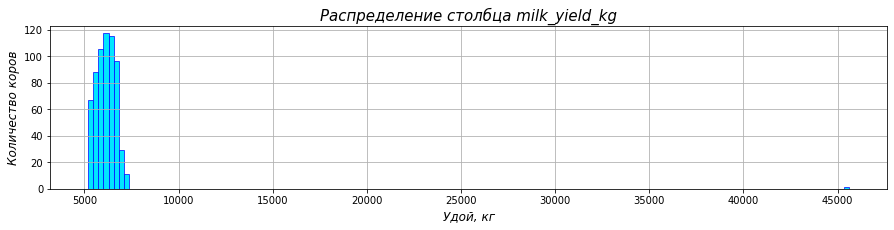

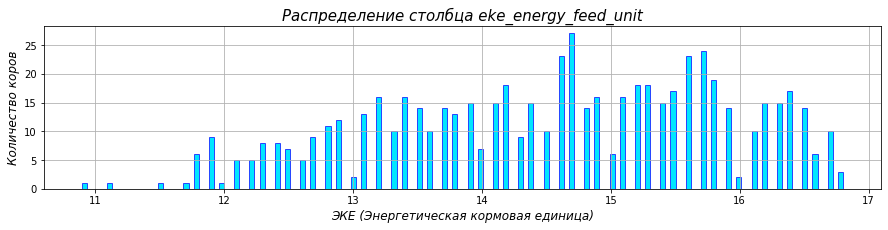

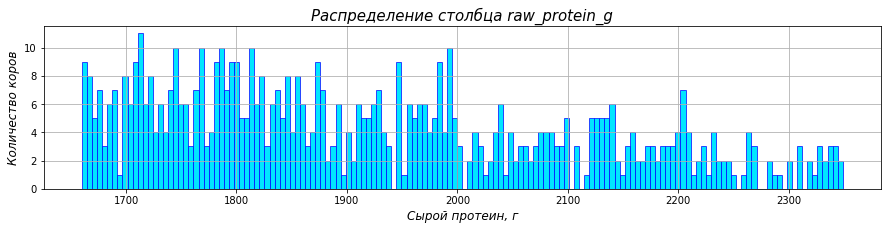

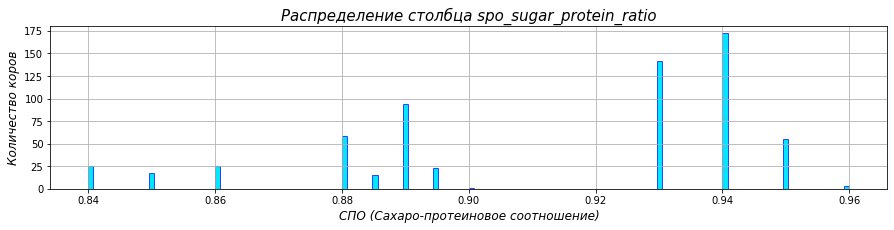

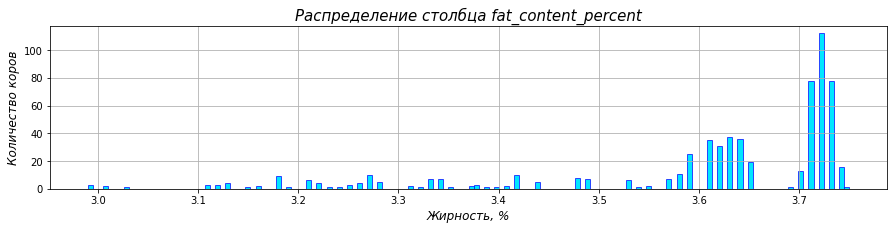

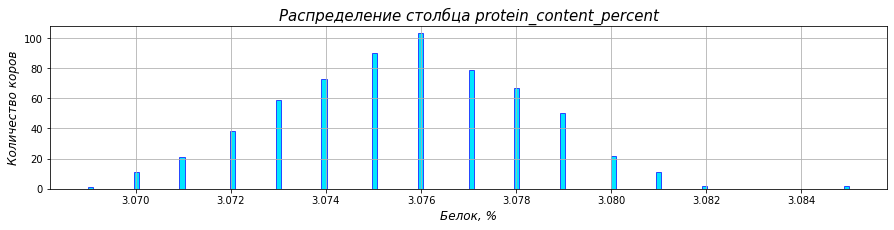

In [34]:
for item in ['milk_yield_kg', 
             'eke_energy_feed_unit', 
             'raw_protein_g', 
             'spo_sugar_protein_ratio', 
             'fat_content_percent',
             'protein_content_percent']:
    hist_plot(full_ferma_main, item, bins=150)

Отобразим ящик с усами для количественных признаков

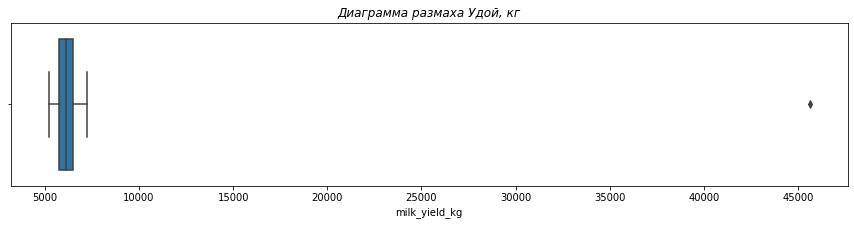

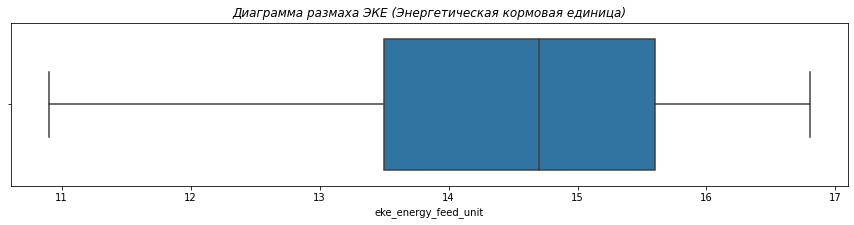

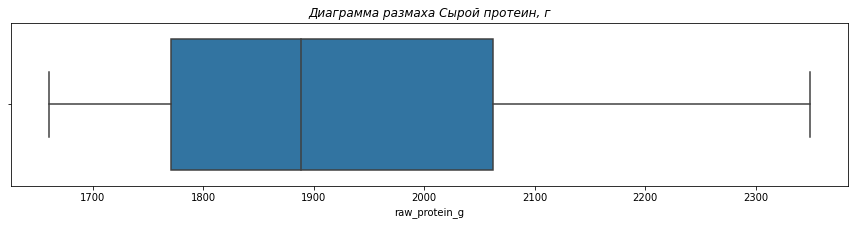

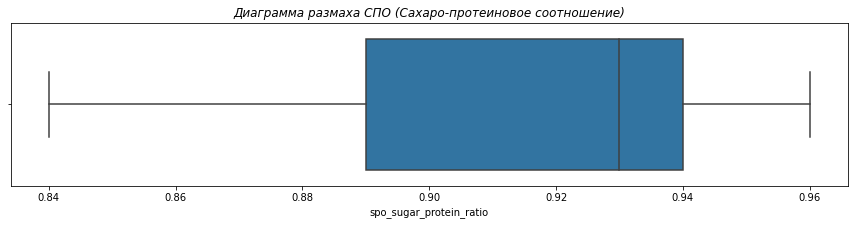

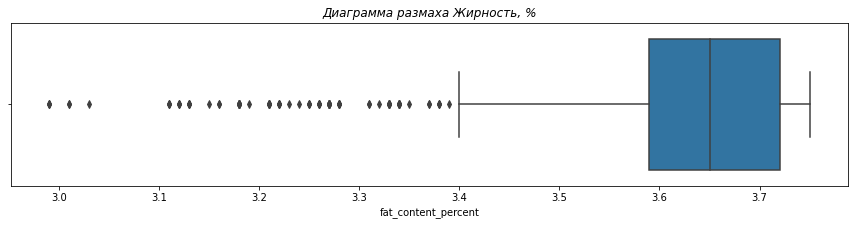

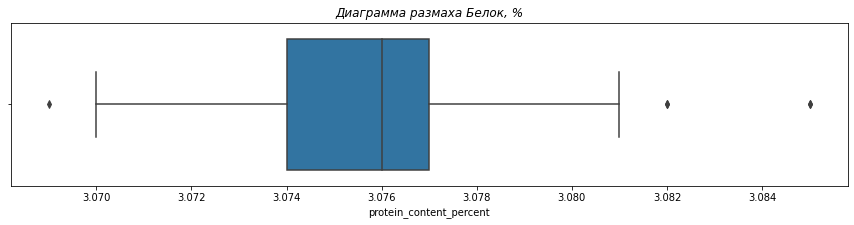

In [84]:
for col in ['milk_yield_kg', 
             'eke_energy_feed_unit', 
             'raw_protein_g', 
             'spo_sugar_protein_ratio', 
             'fat_content_percent',
             'protein_content_percent']:
    plt.figure(figsize=(15, 3))
    sns.boxplot(x=col, orient='h', data=full_ferma_main)
    plt.title(f'Диаграмма размаха {dict_name[col]}', fontsize=12, fontstyle='italic')
    plt.show()

In [36]:
full_ferma_main.query('fat_content_percent < 3.4')['fat_content_percent'].count()

87

In [37]:
round(87 / ferma_main.shape[0] * 100, 2)

13.83

В распределении удоя коров имеется выброс. Также в столбце жирности большая часть данных сосредоточена в правой части (3.4 - 3.8 процентов), но и не мало данных (13.83% от общего количества) размазано в диапазоне от 3 до 3.4, думаю нельзя считать это выбросами, скорее всего данные по которым нужно будет предсказывать целевой признак распределение жирности будет примерно таким же. Столбец с содержанием белков, тоже имеются выбросы

Удалим выбросы в `milk_yield_kg` и `protein_content_percent`

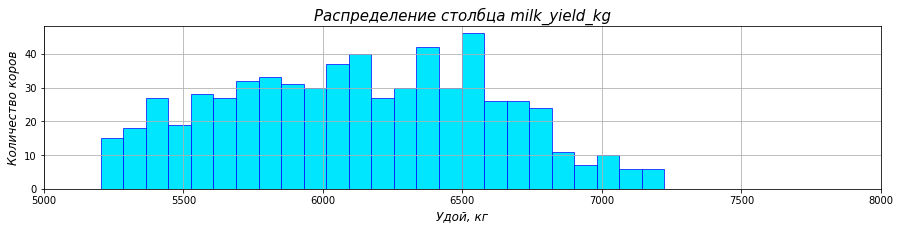

In [38]:
hist_plot(full_ferma_main, 'milk_yield_kg', bins=500)
plt.xlim(5000, 8000);

In [39]:
full_ferma_main.shape

(629, 13)

In [40]:
filtered_ferma_main = full_ferma_main.query('milk_yield_kg < 7500 and 3.070 <= protein_content_percent <= 3.081')
filtered_ferma_main.shape

(623, 13)

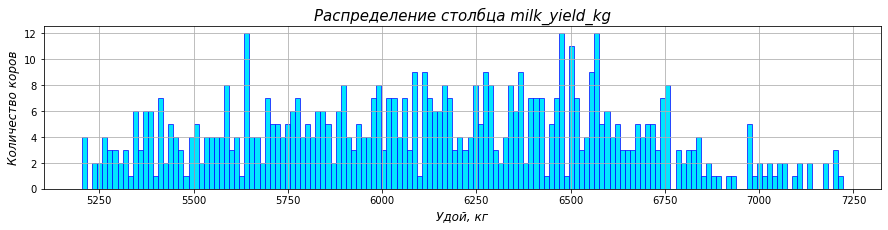

In [41]:
hist_plot(filtered_ferma_main, 'milk_yield_kg', bins=150)

Графики категориальных признаков ferma_main

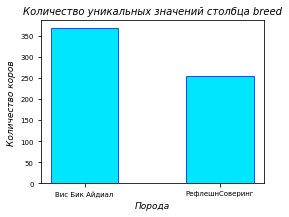

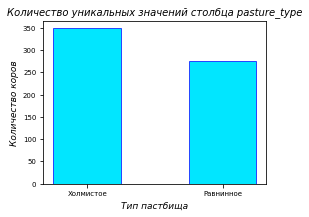

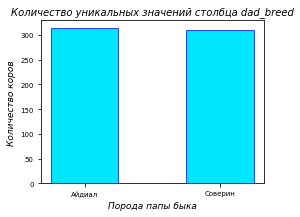

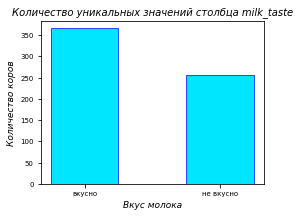

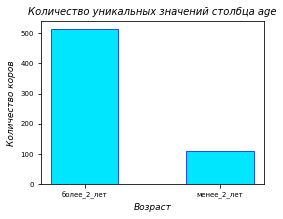

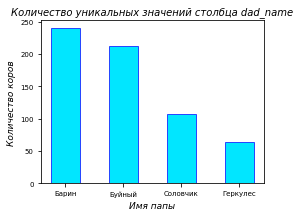

In [42]:
for item in ['breed', 
             'pasture_type', 
             'dad_breed', 
             'milk_taste', 
             'age',
             'dad_name']:
    bar_plot(filtered_ferma_main, item)

### Вывод

В данных об удое и содержании белков имелись выбросы, которые были удалены (их было менее 10). Распределение нормальное только у столбца с процентом белков, остальные распределения довольно таки странные где-то наблюдается возрастающий тренд, где-то наоборот, а где-то мультимодальное распределение.

По категориальным данным можно выделить, то что коров, которым больше 2 лет, в 5 раз больше, чем коров, которым меньше 2 лет.

## Корреляционный анализ

### Тепловая карта корреляций

In [43]:
ferma_main.head()

,id,milk_yield_kg,eke_energy_feed_unit,raw_protein_g,spo_sugar_protein_ratio,breed,pasture_type,dad_breed,fat_content_percent,protein_content_percent,milk_taste,age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет


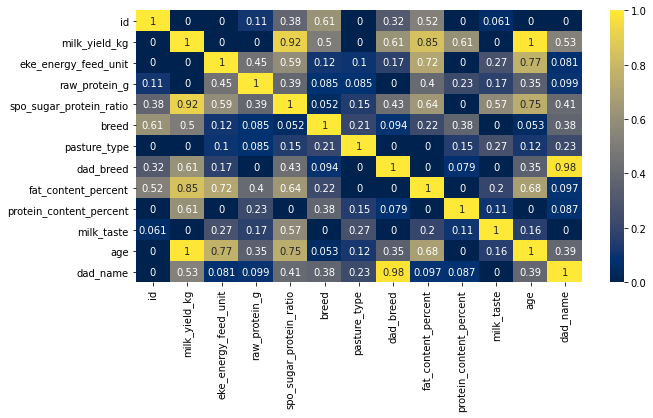

In [44]:
plt.figure(figsize=(10, 5))
interval_cols = ['id',
                 'milk_yield_kg	',
                 'eke_energy_feed_unit',
                 'raw_protein_g',
                 'spo_sugar_protein_ratio',
                 'fat_content_percent',
                 'protein_content_percent']
sns.heatmap(filtered_ferma_main.phik_matrix(interval_cols=interval_cols), annot=True, cmap='cividis');

### Диаграммы рассеяния

Создадим функцию для отрисовки диаграммы рассеяния

In [45]:
def scatter_plot(df, feature, target='milk_yield_kg', hue='breed'):
    plt.figure(figsize=(8, 8))
    sns.scatterplot(x=feature, y=target, hue=hue, data=df)
    plt.title(f'Диаграмма рассеяния {target} от {feature}', fontsize=12, fontstyle='italic')
    plt.xlabel(dict_name[feature], fontsize=10, fontstyle='italic')
    plt.ylabel(dict_name[target], fontsize=10, fontstyle='italic')
    plt.legend(title=dict_name[hue])

Диаграммы рассеяния целевого признака (удой) от остальных признаков в разбивке по породе коров

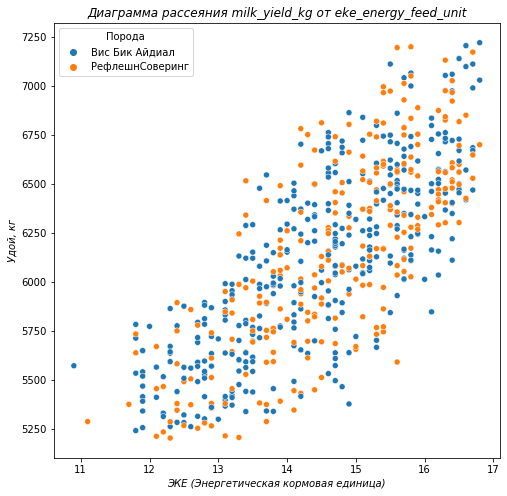

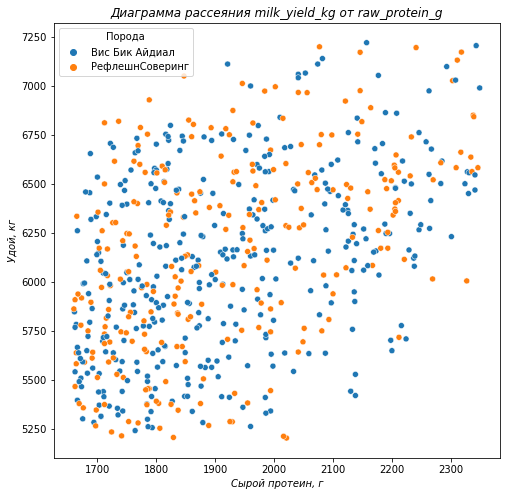

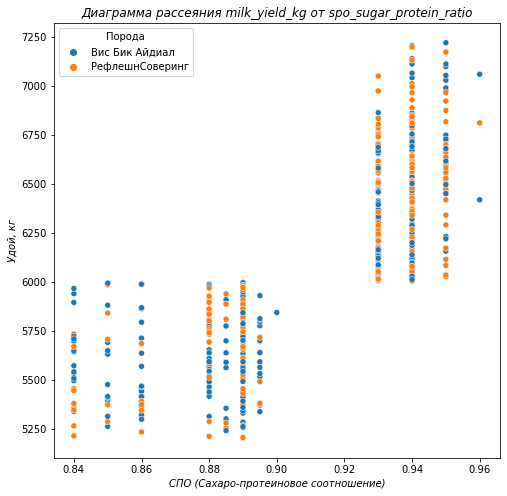

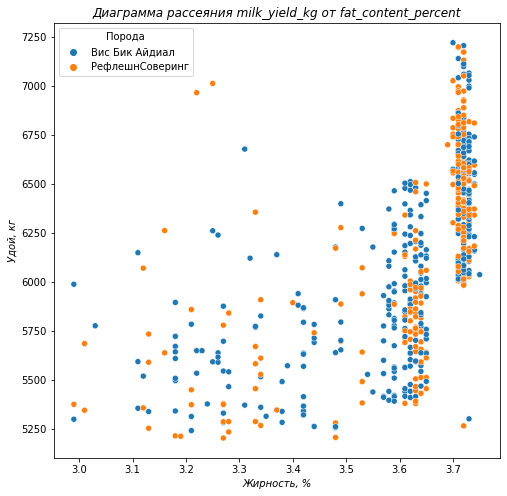

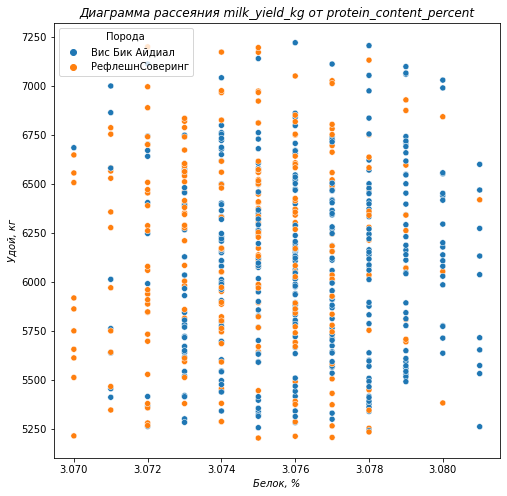

In [46]:
for col in ['eke_energy_feed_unit', 
             'raw_protein_g', 
             'spo_sugar_protein_ratio', 
             'fat_content_percent',
             'protein_content_percent']:
    scatter_plot(filtered_ferma_main, col, target='milk_yield_kg', hue='breed')

Диаграммы рассеяния целевого признака (удой) от остальных признаков в разбивке по вкусу молока

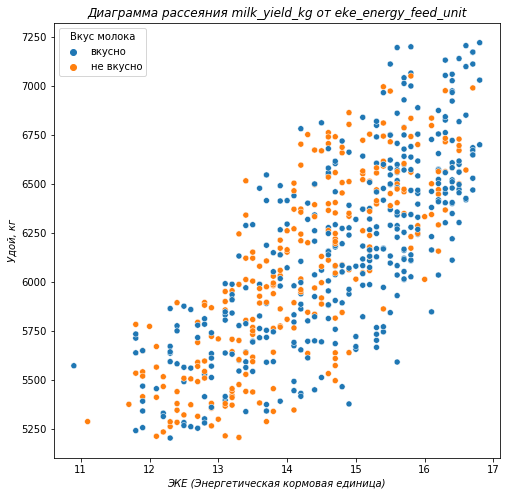

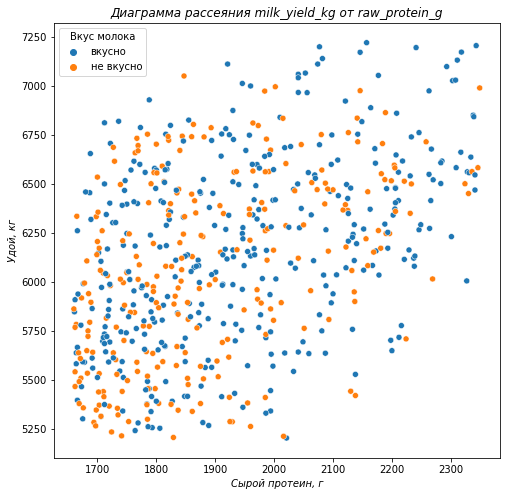

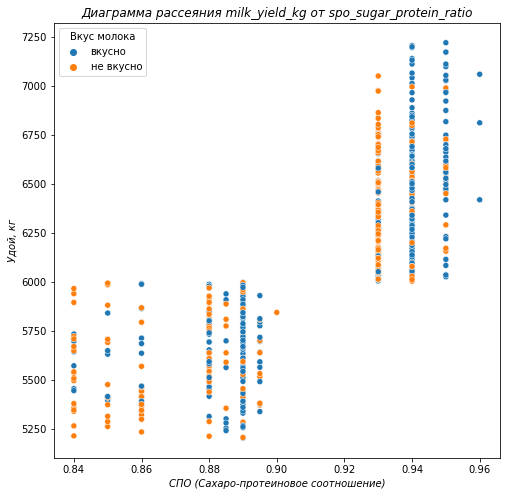

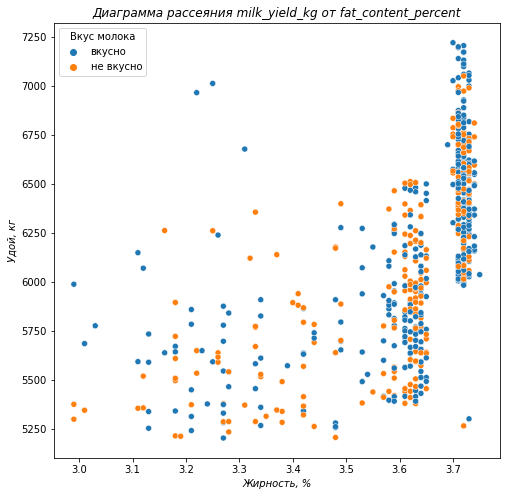

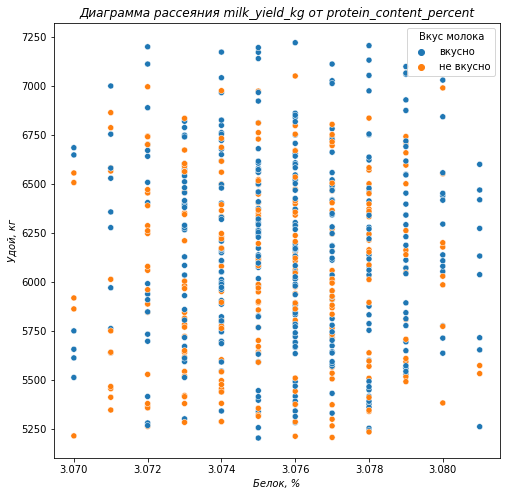

In [47]:
for col in filtered_ferma_main[['eke_energy_feed_unit', 
             'raw_protein_g', 
             'spo_sugar_protein_ratio', 
             'fat_content_percent',
             'protein_content_percent']]:
    scatter_plot(filtered_ferma_main, col, 'milk_yield_kg', hue='milk_taste')

Диаграммы рассеяния целевого признака (удой) от остальных признаков в разбивке по возрасту

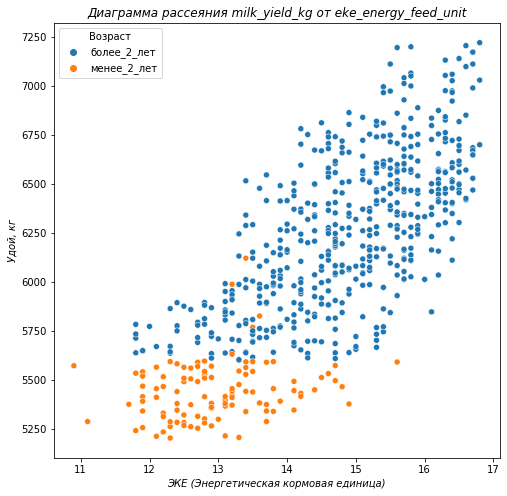

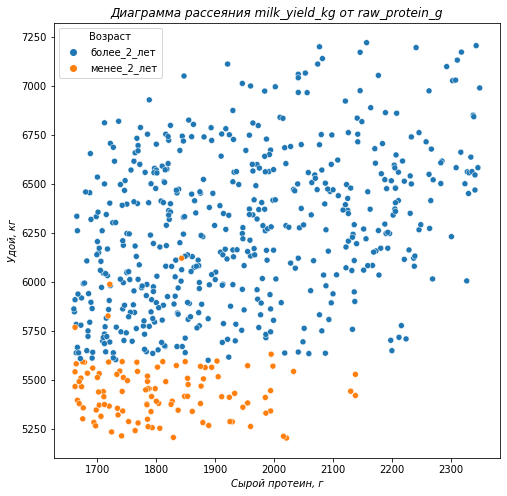

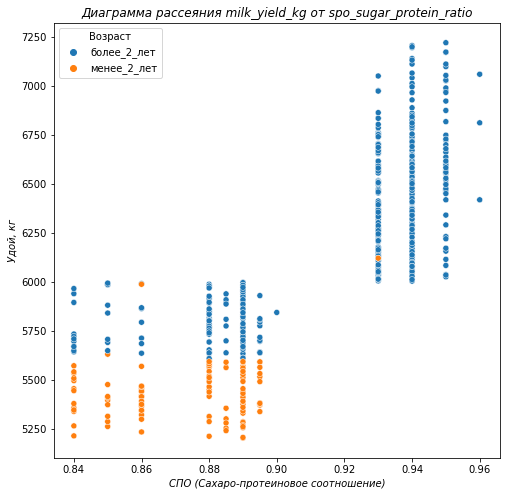

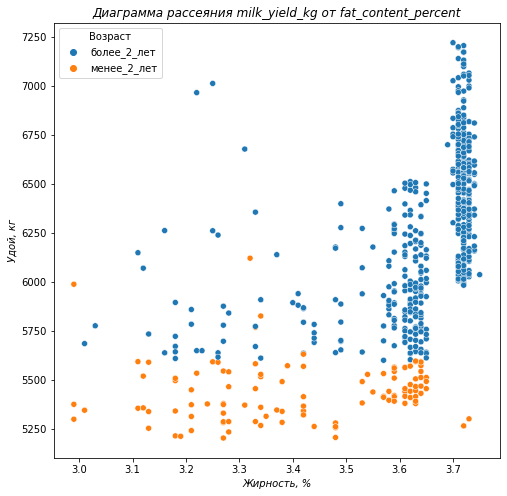

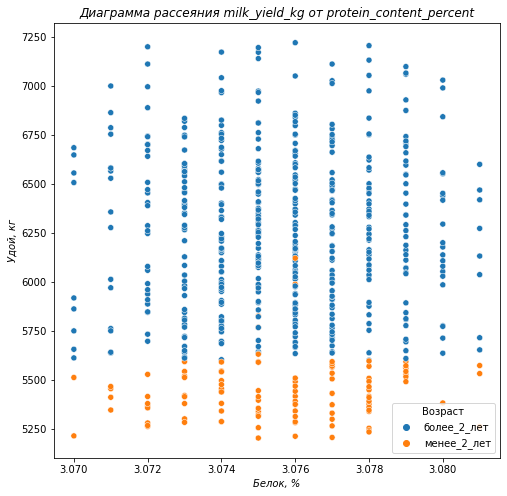

In [48]:
for col in filtered_ferma_main[['eke_energy_feed_unit', 
             'raw_protein_g', 
             'spo_sugar_protein_ratio', 
             'fat_content_percent',
             'protein_content_percent']]:
    scatter_plot(filtered_ferma_main, col, 'milk_yield_kg', hue='age')

### Вывод

По матрице корреляций **удой** больше хорошо коррелирует с СПО и возрастом, а **вкус молока** также коррелирует с СПО

Нелинейность с удоем наблюдается с признаками:
- ЭКЕ
- Сырой протеин
- СПО
- Жирность
- Белки

То есть у всех количественных наблюдается нелинейность с удоем

1. Удой-ЭКЕ имеет зависимость схожую на квадратичную
2. Удой-СПО явно видно разделение на два кластера (то что больше 0.91 и то что меньше)

В разбивке по возрасту коровы явно заметно, что молодые коровы дают заметно меньше молока.

Также на диаграмме рассеяния видно, что породу Рефлешн Соверинг больше кормят кормом с высоким содержанием СПО и такие коровы чаще дают молоко с высокой жирностью, а вот порода Айдиал больше дает молоко с высоким содержанием белков.

## Обучение модели линейной регрессии

Удалим признаки которые не должны влиять на **удой**. Это показатели самого молока, т.е. содержание белков, жирность и вкус молока, id полностью случайный признак тоже подлежит удалению.

### Первая модель линейной регрессии

In [49]:
X = filtered_ferma_main.drop(['id', 
                              'milk_yield_kg', 
                              'milk_taste', 
                              'dad_name', 
                              'fat_content_percent', 
                              'protein_content_percent'], 
                               axis=1)
y = filtered_ferma_main['milk_yield_kg']

In [50]:
X.columns

Index(['eke_energy_feed_unit', 'raw_protein_g', 'spo_sugar_protein_ratio',
       'breed', 'pasture_type', 'dad_breed', 'age'],
      dtype='object')

In [51]:
cat_col_names = ['breed', 'pasture_type', 'dad_breed', 'age']
num_col_names = ['eke_energy_feed_unit', 'raw_protein_g', 'spo_sugar_protein_ratio']

Разделим датафрейм на тестовую и тренеровочную выборки

In [52]:
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=RANDOM_STATE)

print(X_train.shape)
X_test.shape

(373, 7)


(250, 7)

Масштабируем данные

In [53]:
scaler_1 = StandardScaler()

scaler_1.fit(X_train[num_col_names])

X_train_scaled = scaler_1.transform(X_train[num_col_names])
X_test_scaled = scaler_1.transform(X_test[num_col_names])

Закодирует категориальные признаки

In [54]:
encoder_1 = OneHotEncoder(drop='first', sparse=False)

encoder_1.fit(X_train[cat_col_names])

X_train_ohe = encoder_1.transform(X_train[cat_col_names])
X_test_ohe = encoder_1.transform(X_test[cat_col_names])

encoder_col_names = encoder_1.get_feature_names()

Создадим датафреймы из закодированных и отмасштабированных данных

In [55]:
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

Объединяем все преобразованные данные в тренировочный и тестовый датафреймы

In [56]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

X_test.head(3)

,x0_РефлешнСоверинг,x1_Холмистое,x2_Соверин,x3_менее_2_лет,eke_energy_feed_unit,raw_protein_g,spo_sugar_protein_ratio
0,1.0,1.0,1.0,0.0,-0.738524,0.061432,-0.823407
1,0.0,0.0,1.0,1.0,-2.140801,-1.453690,-2.411467
2,0.0,1.0,0.0,0.0,1.442796,0.794901,0.764653


Обучим модель

In [57]:
lr_model_1 = LinearRegression()

lr_model_1.fit(X_train, y_train)

predictions = lr_model_1.predict(X_test)

Выведем метрики качества модели

In [58]:
mae = mean_absolute_error(y_test, predictions)
print(f'MAE: {round(mae, 2)}')

mse = mean_squared_error(y_test, predictions)
print(f'MSE: {round(mse, 2)}')

rmse = mean_squared_error(y_test, predictions, squared=False)
print(f'RMSE: {round(rmse, 2)}')

r2 = r2_score(y_test, predictions)
print(f'Коэффициент детерминации: {round(r2, 3)}')

MAE: 167.35
MSE: 44616.57
RMSE: 211.23
Коэффициент детерминации: 0.795


Анализ остатков

In [59]:
def residuals_analysis(y_test=y_test, predictions=predictions):
    
    residuals = y_test - predictions
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
    ax[0].axvline(x=residuals.mean(), color='#00e000', label=f'Среднее значение ошибки: {residuals.mean()}')
    ax[0].axvline(x=0, color='#ffff00', linestyle='--', label='Среднее значение ошибки: 0')
    ax[0].hist(residuals)
    ax[0].set_title('Гистограмма распределения остатков')
    ax[0].set_xlabel('Остатки')
    ax[0].legend(fontsize=8)
    
    ax[1].scatter(predictions, residuals)
    ax[1].set_xlabel('Предсказания модели')
    ax[1].set_ylabel('Остатки')
    ax[1].set_title('Анализ дисперсии')
    plt.show()

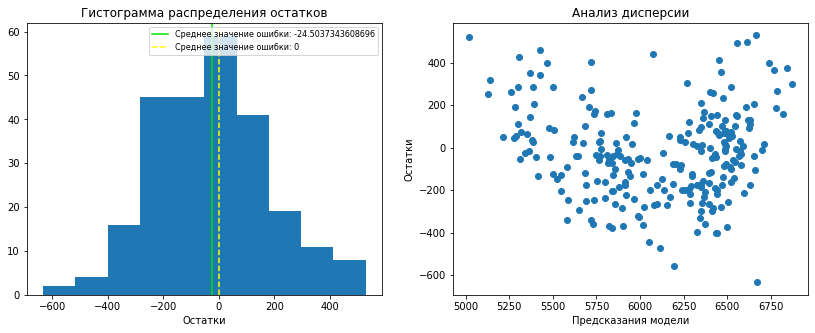

In [60]:
residuals_analysis(y_test, predictions)

### Вторая модель линейной регрессии

На диаграмме рассеяния СПО и удоя наблюдается нелинейная связь, имеется два кластера, которые можно преобразовать в бинарный признак. Также между удоем и ЕКЕ наблюдается квадратичная связь, поэтому возведем значения ЕКЕ в квадрат

In [61]:
filtered_ferma_main = filtered_ferma_main.copy()
filtered_ferma_main['spo_binary'] = filtered_ferma_main['spo_sugar_protein_ratio'].apply(lambda x: 1.0 if x > 0.91 else 0.0)
filtered_ferma_main['EKE_squared'] = filtered_ferma_main['eke_energy_feed_unit'].apply(lambda x: x ** 2)
filtered_ferma_main.head(3)

,id,milk_yield_kg,eke_energy_feed_unit,raw_protein_g,spo_sugar_protein_ratio,breed,pasture_type,dad_breed,fat_content_percent,protein_content_percent,milk_taste,age,dad_name,spo_binary,EKE_squared
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Буйный,0.0,201.64
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,Соловчик,0.0,163.84
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,Барин,0.0,196.00


In [62]:
X = filtered_ferma_main.drop(['id', 
                              'milk_yield_kg', 
                              'milk_taste', 
                              'dad_name', 
                              'fat_content_percent', 
                              'protein_content_percent',
                              'eke_energy_feed_unit',
                              'spo_sugar_protein_ratio'], 
                               axis=1)
y = filtered_ferma_main['milk_yield_kg']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.4,
                                                    random_state=RANDOM_STATE)

cat_col_names = ['breed', 'pasture_type', 'dad_breed', 'age']
num_col_names = ['EKE_squared', 'raw_protein_g', 'spo_binary']

# Масштабирование данных
scaler_2 = StandardScaler()

scaler_2.fit(X_train[num_col_names])

X_train_scaled = scaler_2.transform(X_train[num_col_names])
X_test_scaled = scaler_2.transform(X_test[num_col_names])

# Кодировка категориальных признаков
encoder_2 = OneHotEncoder(drop='first', sparse=False)

encoder_2.fit(X_train[cat_col_names])

X_train_ohe = encoder_2.transform(X_train[cat_col_names])
X_test_ohe = encoder_2.transform(X_test[cat_col_names])

encoder_col_names = encoder_2.get_feature_names()

#Создаем датафреймы из обработанных данных
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

# Соединяем датафреймы
X_train = pd.concat([X_train_scaled, X_train_ohe], axis=1)
X_test = pd.concat([X_test_scaled, X_test_ohe], axis=1)


# Обучим модель
lr_model_2 = LinearRegression()

lr_model_2.fit(X_train, y_train)
predictions = lr_model_2.predict(X_test)


# Метрики качества модели
mae = mean_absolute_error(y_test, predictions)
print(f'MAE: {round(mae, 2)}')

mse = mean_squared_error(y_test, predictions)
print(f'MSE: {round(mse, 2)}')

rmse = mean_squared_error(y_test, predictions, squared=False)
print(f'RMSE: {round(rmse, 2)}')

r2 = r2_score(y_test, predictions)
print(f'Коэффициент детерминации: {round(r2, 3)}')

MAE: 145.77
MSE: 35825.11
RMSE: 189.28
Коэффициент детерминации: 0.835


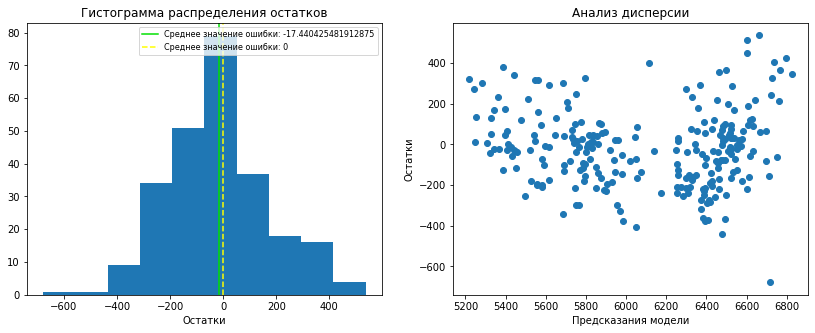

In [63]:
residuals_analysis(y_test, predictions)

### Третья модель линейной регрессии

Добавим в модель признак Имя папы

In [64]:
X = filtered_ferma_main.drop(['id', 
                              'milk_yield_kg', 
                              'milk_taste',
                              'fat_content_percent', 
                              'protein_content_percent',
                              'eke_energy_feed_unit',
                              'spo_sugar_protein_ratio'], 
                               axis=1)
y = filtered_ferma_main['milk_yield_kg']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.4,
                                                    random_state=RANDOM_STATE)

cat_col_names = ['breed', 'pasture_type', 'dad_breed', 'age', 'dad_name']
num_col_names = ['EKE_squared', 'raw_protein_g', 'spo_binary']

# Масштабирование данных
scaler_3 = StandardScaler()

scaler_3.fit(X_train[num_col_names])

X_train_scaled = scaler_3.transform(X_train[num_col_names])
X_test_scaled = scaler_3.transform(X_test[num_col_names])

# Кодировка категориальных признаков
encoder_3 = OneHotEncoder(drop='first', sparse=False)

encoder_3.fit(X_train[cat_col_names])

X_train_ohe = encoder_3.transform(X_train[cat_col_names])
X_test_ohe = encoder_3.transform(X_test[cat_col_names])

encoder_col_names = encoder_3.get_feature_names()

#Создаем датафреймы из обработанных данных
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

# Соединяем датафреймы
X_train = pd.concat([X_train_scaled, X_train_ohe], axis=1)
X_test = pd.concat([X_test_scaled, X_test_ohe], axis=1)


# Обучим модель
lr_model_3 = LinearRegression()

lr_model_3.fit(X_train, y_train)
predictions = lr_model_3.predict(X_test)


# Метрики качества модели
mae = mean_absolute_error(y_test, predictions)
print(f'MAE: {round(mae, 2)}')

mse = mean_squared_error(y_test, predictions)
print(f'MSE: {round(mse, 2)}')

rmse = mean_squared_error(y_test, predictions, squared=False)
print(f'RMSE: {round(rmse, 2)}')

r2 = r2_score(y_test, predictions)
print(f'Коэффициент детерминации: {round(r2, 3)}')

MAE: 148.51
MSE: 36260.72
RMSE: 190.42
Коэффициент детерминации: 0.833


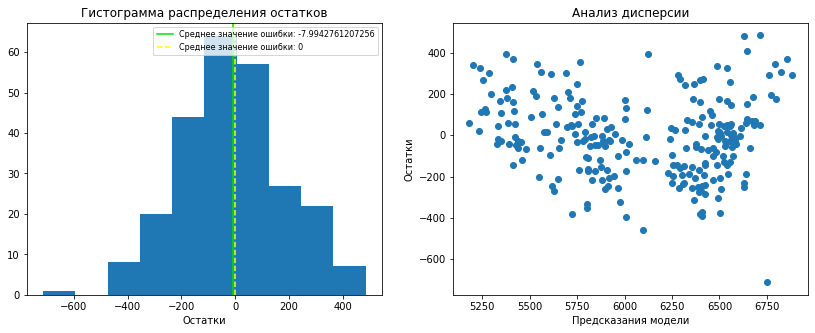

In [65]:
residuals_analysis(y_test, predictions)

### Доверительный интервал лучшей модели

Лучшая модель 3, так как у нее по остаткам лучше чем у первых двух, а метрики качества лишь немного уступают 2-ой модели

In [66]:
residuals = y_test - predictions
quantiles=(0.025, 0.975)

lower_quantile = np.quantile(residuals, quantiles[0])
upper_quantile = np.quantile(residuals, quantiles[1])

print(f"Доверительный интервал прогноза: [{lower_quantile}, {upper_quantile}]")

Доверительный интервал прогноза: [-375.20228297178113, 365.7138638102212]


### Предскажем удой коров

In [67]:
filtered_ferma_main['spo_sugar_protein_ratio'].mean() * 1.05

0.9589466292134831

Для СПО больше 0.91 мы указывали единичку

In [68]:
cow_buy['EKE_squared'] = (filtered_ferma_main['eke_energy_feed_unit'].mean() * 1.05) ** 2
cow_buy['raw_protein_g'] = filtered_ferma_main['raw_protein_g'].mean() * 1.05
cow_buy['spo_binary'] = 1.0

In [69]:
cow_buy.rename(columns={'current_fat_content_percent': 'fat_content_percent', 
                       'current_protein_content_percent': 'protein_content_percent'},
                        inplace=True)

In [70]:
cow_buy.head(3)

,breed,pasture_type,dad_breed,dad_name,fat_content_percent,protein_content_percent,age,EKE_squared,raw_protein_g,spo_binary
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,233.378833,2019.77191,1.0
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,233.378833,2019.77191,1.0
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,233.378833,2019.77191,1.0


In [71]:
cat_col_names = ['breed', 'pasture_type', 'dad_breed', 'age', 'dad_name']
num_col_names = ['EKE_squared', 'raw_protein_g', 'spo_binary']

X_real_scaled = scaler_3.transform(cow_buy[num_col_names])


X_real_ohe = encoder_3.transform(cow_buy[cat_col_names])
encoder_col_names = encoder_3.get_feature_names()

X_real_scaled = pd.DataFrame(X_real_scaled, columns=num_col_names)
X_real_ohe = pd.DataFrame(X_real_ohe, columns=encoder_col_names)

X_real = pd.concat([X_real_scaled, X_real_ohe], axis=1)

predictions = lr_model_3.predict(X_real)

In [72]:
cow_buy['prediction_milk_yield_kg'] = predictions

In [73]:
cow_buy.head()

,breed,pasture_type,dad_breed,dad_name,fat_content_percent,protein_content_percent,age,EKE_squared,raw_protein_g,spo_binary,prediction_milk_yield_kg
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,233.378833,2019.77191,1.0,6612.632562
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,233.378833,2019.77191,1.0,6404.298004
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,233.378833,2019.77191,1.0,6286.140664
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,233.378833,2019.77191,1.0,6616.571449
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,233.378833,2019.77191,1.0,6551.266033


### Вывод

**Первая модель:**

- MAE: 167.35
- MSE: 44616.57
- RMSE: 211.23
- Коэффициент детерминации: 0.795

**Вторая модель:**

- MAE: 145.77
- MSE: 35825.11
- RMSE: 189.28
- Коэффициент детерминации: 0.835

**Третья модель:**

- MAE: 148.51
- MSE: 36260.72
- RMSE: 190.42
- Коэффициент детерминации: 0.833

После преобразования столбца с СПО модель (вторая) по метрикам MAE, MSE, RMSE улучшилась (метрики уменьшились). Третья модель после добавления стобца `Имя папы` немного ухудшила свои показатели. Коэффициент детерминации у второй модели увеличился на 4 процента по сравнению с первой моделью, но при добавлении нового признака (в 3 модель) коэффициент детерминации немного уменьшился (на 0.2 процента), несущественное отличие

**Остатки:**

- первая модель - (-24,5)
- вторая модель - (-17,44)
- третья модель - (-7.99)

Средний отрицательный остаток говорит о том, что модель чаще переоценивает целевой признак, для третьей модели он самый маленький, что хорошо, а вот по поводу дисперсии, она получилась плюс минус одинаковая у трех моделей (веерообразная), но у 3 модели дисперсия сплющилась по вертикали.

**Итог:** Лучшая модель по моему мнению третья, у нее все хорошо с остатками относительно других моделей, а по метрикам она совсем чуток отстает от второй модели.

## Обучение модели логистической регрессии

In [74]:
filtered_ferma_main['milk_taste_binary'] = np.where(filtered_ferma_main['milk_taste']=='вкусно',
                                                    1.0, 0.0)

In [75]:
filtered_ferma_main.head(3)

,id,milk_yield_kg,eke_energy_feed_unit,raw_protein_g,spo_sugar_protein_ratio,breed,pasture_type,dad_breed,fat_content_percent,protein_content_percent,milk_taste,age,dad_name,spo_binary,EKE_squared,milk_taste_binary
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,Буйный,0.0,201.64,1.0
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,Соловчик,0.0,163.84,1.0
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,Барин,0.0,196.00,0.0


In [76]:
X = filtered_ferma_main.drop(['id', 
                              'milk_yield_kg',
                              'milk_taste',
                              'spo_sugar_protein_ratio',
                              'milk_taste_binary',
                              'eke_energy_feed_unit'],
                               axis=1)
y = filtered_ferma_main['milk_taste_binary']

cat_col_names = ['breed', 'pasture_type', 'dad_breed', 'age', 'dad_name']
num_col_names = ['EKE_squared',
                 'raw_protein_g',
                 'fat_content_percent',
                 'protein_content_percent',
                 'spo_binary']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.4,
                                                    random_state=RANDOM_STATE)

# Масштабирование данных
scaler_4 = StandardScaler()

scaler_4.fit(X_train[num_col_names])

X_train_scaled = scaler_4.transform(X_train[num_col_names])
X_test_scaled = scaler_4.transform(X_test[num_col_names])

# Кодировка категориальных признаков
encoder_4 = OneHotEncoder(drop='first', sparse=False)

encoder_4.fit(X_train[cat_col_names])

X_train_ohe = encoder_4.transform(X_train[cat_col_names])
X_test_ohe = encoder_4.transform(X_test[cat_col_names])

encoder_col_names = encoder_4.get_feature_names()

#Создаем датафреймы из обработанных данных
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

# Соединяем датафреймы
X_train = pd.concat([X_train_scaled, X_train_ohe], axis=1)
X_test = pd.concat([X_test_scaled, X_test_ohe], axis=1)


# Обучим модель классификации
clf_1 = LogisticRegression()
clf_1.fit(X_train, y_train)
clf_1.classes_

array([0., 1.])

Подберем порог, чтобы precision был максимальным. Precision выбрал потому, что наша цель недопустить того, чтобы модель присваивала значение вкусного молока невкусному.

<div class="alert alert-info">
Обычно я пишу это в промежуточном выводе) dad_name добавил
</div>

In [78]:
y_proba = clf_1.predict_proba(X_test)[:, 1]

data = pd.DataFrame(zip(y_test, y_proba), columns=['y_valid', 'y_proba'])

thresholds = [round(i,3) for i in np.linspace(0,1,num = 100,endpoint=False)]
for i in thresholds:
    data['y_pred_'] = data['y_proba'].apply(lambda x: 1 if x>= i else 0)
    precision = precision_score(data['y_valid'], data['y_pred_'])
    if precision == 1.0:
        print(f'Порог - {i}')
        break

Порог - 0.82


accuracy:  0.48
recall:  0.133
precision:  1.0


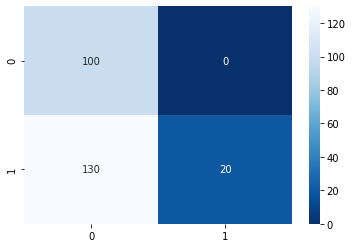

In [79]:
cm = confusion_matrix(data['y_valid'], data['y_pred_'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r');

accuracy = accuracy_score(data['y_valid'], data['y_pred_'])
recall = recall_score(data['y_valid'], data['y_pred_'])
precision = precision_score(data['y_valid'], data['y_pred_'])
print('accuracy: ', round(accuracy ,3))
print('recall: ', round(recall ,3))
print('precision: ', round(precision,3))

### Предскажем вкус молока

In [80]:
cat_col_names = ['breed', 'pasture_type', 'dad_breed', 'age', 'dad_name']
num_col_names = ['EKE_squared',
                 'raw_protein_g',
                 'fat_content_percent',
                 'protein_content_percent',
                 'spo_binary']

X_real_scaled = scaler_4.transform(cow_buy[num_col_names])


X_real_ohe = encoder_4.transform(cow_buy[cat_col_names])
encoder_col_names = encoder_4.get_feature_names()

X_real_scaled = pd.DataFrame(X_real_scaled, columns=num_col_names)
X_real_ohe = pd.DataFrame(X_real_ohe, columns=encoder_col_names)

X_real = pd.concat([X_real_scaled, X_real_ohe], axis=1)

y_proba = clf_1.predict_proba(X_real)[:, 1]

Используем нужный порог - 0.82

In [81]:
cow_buy['milk_taste_pred'] = ['вкусно' if i >= 0.82 else 'не вкусно' for i in y_proba]
cow_buy.head()

,breed,pasture_type,dad_breed,dad_name,fat_content_percent,protein_content_percent,age,EKE_squared,raw_protein_g,spo_binary,prediction_milk_yield_kg,milk_taste_pred
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,233.378833,2019.77191,1.0,6612.632562,не вкусно
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,233.378833,2019.77191,1.0,6404.298004,не вкусно
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,233.378833,2019.77191,1.0,6286.140664,не вкусно
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,233.378833,2019.77191,1.0,6616.571449,не вкусно
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,233.378833,2019.77191,1.0,6551.266033,не вкусно


In [82]:
cow_buy['milk_taste_pred'].value_counts()

не вкусно    16
Name: milk_taste_pred, dtype: int64

### Вывод:

Метрики при пороге в 0.82:

- accuracy:  0.48
- recall:  0.133
- precision:  1.0

Нам важно сто процентно купить корову с вкусным молоком поэтому важной метриков выбрал `precision` так как она обнуляет FP, а это значит, что не вкусному молоку не будет присвоено значение вкусного, а то что модель будет прогнозировать для коров с вкусным молоком - не вкусное молоко, это не так критично

## Итоговые выводы

In [83]:
cow_buy.query('prediction_milk_yield_kg > 6000 and milk_taste_pred == "вкусно"')

,breed,pasture_type,dad_breed,dad_name,fat_content_percent,protein_content_percent,age,EKE_squared,raw_protein_g,spo_binary,prediction_milk_yield_kg,milk_taste_pred


По итогам работы модели регрессии и классификации , получаем, что ни одна корова не подходит под критерии фермера, по крайней мере по вкусу. Но это все потому, что у модели классификаци низкая точность, имеющиеся признаки не могут в достаточной степени объяснить целевой признак, улучшить модель возможно с помощью добавления новых признаков, которые лучше смогут объяснить таргет

Метрики лучшей модели линейной регресси:
- MAE: 147.69
- MSE: 35965.2
- RMSE: 189.64
- Коэффициент детерминации: 0.834

Метрики модели классификации при пороге 0.82:
- accuracy: 0.48
- recall: 0.133
- precision: 1.0